In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
#til at slå op i masses.dat
data = np.transpose(np.loadtxt("masses.txt"))

N=data[0]
Z=data[1]
A=data[2]
massExcess=data[3]
bEPrNkl=data[4]

mp = 938.272
me = 0.510998
mn = 939.565

def me2(a, z):
    a_indices = np.where(A == a)
    z_indices = np.where(Z == z)
    a = lambda: print('Could not find mass excess for given numbers')
    for i in range(len(a_indices[0])):
        if np.any(z_indices[0] == a_indices[0][i]):
            me = massExcess[a_indices[0][i]]/1000
            a = lambda: me
    return a()

def m2(a,z): 
    return a*931.49410242+me2(a,z)

In [3]:
def factor(m1, m2, t): #t er lab scatteringvinkel i radianer.
    mr = m1*m2/(m1+m2)
    
    def toSolve(x):
        return 1/np.tan(x)+m1/m2*1/np.sin(x)-1/np.tan(t)
    
    vinkelCOM = fsolve(toSolve,t) #brug t som startgæt til fsolve
    
    return mr**2*(1/m1**2+1/m2**2+2/(m1*m2)*np.cos(vinkelCOM))
    

In [4]:
factor(m2(4,2)-2*me,m2(19,9)-9*me,160/360*2*np.pi)

array([0.43601494])

In [5]:
factor(m2(4,2)-2*me,m2(27,13)-13*me,160/360*2*np.pi)

array([0.55996275])

In [6]:
factor(m2(4,2)-2*me,m2(40,20)-20*me,160/360*2*np.pi)

array([0.6771254])

In [7]:
factor(m2(4,2)-2*me,m2(93,41)-41*me,160/360*2*np.pi)

array([0.84600229])

In [16]:
vinkler = np.linspace(0,180,1000)
factors = []

for v in vinkler:
    factors.append(factor(mp,m2(27,13),v/360*2*np.pi))

<ipython-input-3-e28c6a5640b4>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.tan(x)+m1/m2*1/np.sin(x)-1/np.tan(t)
<ipython-input-3-e28c6a5640b4>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/np.tan(x)+m1/m2*1/np.sin(x)-1/np.tan(t)
<ipython-input-3-e28c6a5640b4>:5: RuntimeWarning: invalid value encountered in subtract
  return 1/np.tan(x)+m1/m2*1/np.sin(x)-1/np.tan(t)
C:\Users\Jeppe\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(1600.0, 1950.0)

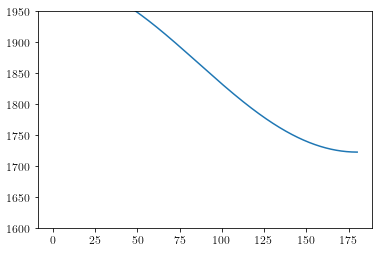

In [21]:
plt.plot(vinkler,2000*np.array(factors))
plt.ylim(1600,1950)